In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/VISHAL JHA/OneDrive/Desktop/bank_churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.CustomerId.nunique()

10000

In [7]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
print(f"Dataframe dimensions: {df.shape}")
df.head()

Dataframe dimensions: (10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


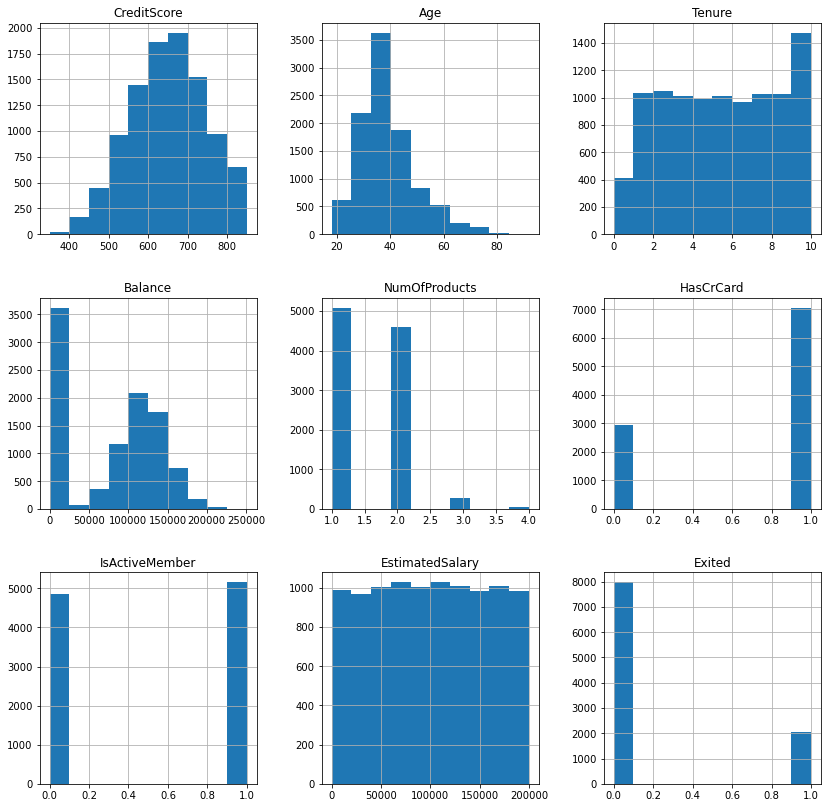

In [8]:
# Plot histogram grid
df.hist(figsize=(14,14))

plt.show()

In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


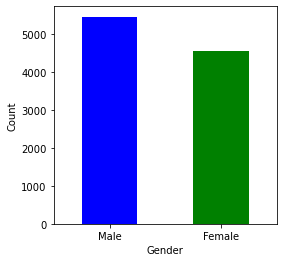

In [10]:
# Bar plot for "Gender"
plt.figure(figsize=(4,4))
df['Gender'].value_counts().plot.bar(color=['b', 'g'])
plt.ylabel('Count')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

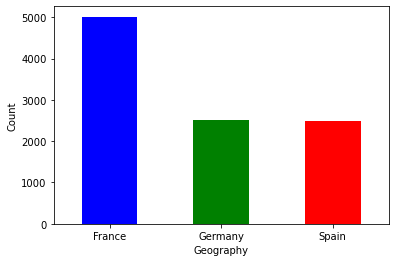

In [11]:
# Bar plot for "Geography"
plt.figure(figsize=(6,4))
df['Geography'].value_counts().plot.bar(color=['b', 'g', 'r'])
plt.ylabel('Count')
plt.xlabel('Geography')
plt.xticks(rotation=0)
plt.show()

In [12]:
#Segment "Exited" by gender and display the frequency within each class
grouped = df.groupby('Gender')['Exited'].agg(Count='value_counts')
grouped

Count
Gender Exited       
Female 0        3404
       1        1139
Male   0        4559
       1         898

# Encoding Categorical Data

In [13]:
df = pd.get_dummies(df,drop_first = True)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

C:\Users\VISHAL JHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

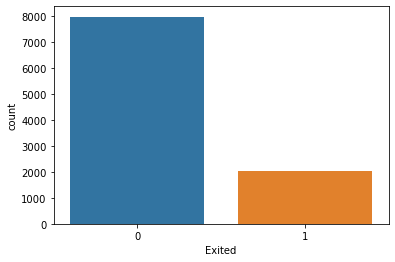

In [16]:
sns.countplot(df['Exited'])

In [17]:
X = df.drop('Exited',axis=1)
y = df['Exited']

# Handling Imbalanced Data with SMOTE

In [18]:
!pip install imblearn

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [21]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

C:\Users\VISHAL JHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

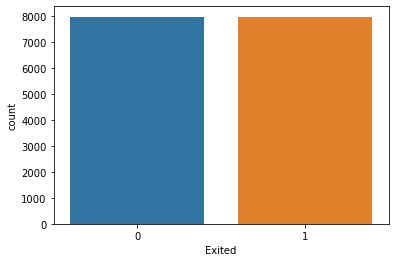

In [22]:
sns.countplot(y_res)

# Splitting The Dataset into Training Set and Test Set

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=47)

# Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()

In [27]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
X_train

array([[ 0.76210805, -0.90001665,  0.79752832, ..., -0.57182592,
         2.16780684, -0.83536659],
       [-0.68071947, -0.80022665,  1.16690289, ..., -0.57182592,
        -0.46129571,  1.19707923],
       [-1.32561965,  0.19767336,  0.79752832, ..., -0.57182592,
         2.16780684,  1.19707923],
       ...,
       [ 0.75117754,  0.29746336, -1.0493445 , ..., -0.57182592,
        -0.46129571,  1.19707923],
       [ 0.47791475, -0.99980665, -1.41871906, ..., -0.57182592,
        -0.46129571,  1.19707923],
       [ 1.63654897,  2.19347338, -1.41871906, ..., -0.57182592,
        -0.46129571, -0.83536659]])

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [30]:
log = LogisticRegression()

In [31]:
log.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred1 = log.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred1)

0.7771033905399749

In [34]:
precision_score(y_test, y_pred1)

0.7610837438423645

In [35]:
recall_score(y_test, y_pred1)      

0.7933247753530167

In [36]:
f1_score(y_test,y_pred1)

0.7768698931489628

# KNeighbors Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier()

In [39]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [40]:
y_pred3=knn.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred3)

0.8126831310171619

In [42]:
precision_score(y_test, y_pred3)

0.7916666666666666

In [43]:
recall_score(y_test, y_pred3)

0.8373983739837398

In [44]:
f1_score(y_test,y_pred3)

0.8138906217508838

# Desicion Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred4=dt.predict(X_test)
accuracy_score(y_test, y_pred4)

0.7869401423189619

In [48]:
precision_score(y_test, y_pred4)

0.7706196142798523

In [49]:
recall_score(y_test, y_pred4)

0.803594351732991

In [50]:
f1_score(y_test,y_pred4)

0.7867616254713029

# Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
y_pred5=rf.predict(X_test)
accuracy_score(y_test,y_pred5)

0.8499372122226874

In [53]:
precision_score(y_test, y_pred5)

0.8423499577345731

In [54]:
recall_score(y_test, y_pred5)

0.8528027385537014

In [55]:
f1_score(y_test,y_pred5)

0.8475441207739741

# Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [57]:
y_pred6=gbc.predict(X_test)
accuracy_score(y_test,y_pred6)

0.8313101716199247

In [58]:
precision_score(y_test,y_pred6)

0.8286818376985831

In [59]:
recall_score(y_test,y_pred6)

0.8258451005562687

In [60]:
f1_score(y_test,y_pred6)

0.8272610372910416

# XGBoost

In [61]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, verbosity = 0)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [62]:
y_pred7=model_xgb.predict(X_test)
accuracy_score(y_test,y_pred7)

0.8524487233151946

In [63]:
precision_score(y_test,y_pred7)

0.8440134907251264

In [64]:
recall_score(y_test,y_pred6)

0.8258451005562687

In [65]:
f1_score(y_test,y_pred6)

0.8272610372910416

In [66]:
performance_summary = pd.DataFrame({
    'Model':['LR','KNN','DT','RF','GBC','XGB'],
    'ACC':[accuracy_score(y_test,y_pred1),
           accuracy_score(y_test,y_pred3),
           accuracy_score(y_test,y_pred4),
           accuracy_score(y_test,y_pred5),
           accuracy_score(y_test,y_pred6),
           accuracy_score(y_test,y_pred7)
          ]
})

In [67]:
performance_summary

,Model,ACC
0,LR,0.777103
1,KNN,0.812683
2,DT,0.786940
3,RF,0.849937
4,GBC,0.831310
5,XGB,0.852449


C:\Users\VISHAL JHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='ACC'>

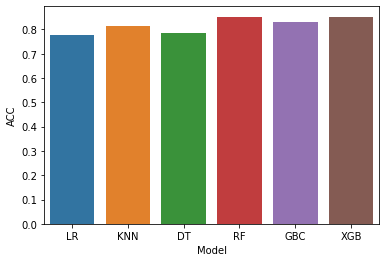

In [68]:
sns.barplot(performance_summary['Model'],performance_summary['ACC'])

In [69]:
performance_summary = pd.DataFrame({
    'Model':['LR','KNN','DT','RF','GBC','XGB'],
    'PRECISION':[precision_score(y_test,y_pred1),
           precision_score(y_test,y_pred3),
           precision_score(y_test,y_pred4),
           precision_score(y_test,y_pred5),
           precision_score(y_test,y_pred6),
            precision_score(y_test,y_pred6)
          ]
})

In [70]:
performance_summary

,Model,PRECISION
0,LR,0.761084
1,KNN,0.791667
2,DT,0.770620
3,RF,0.842350
4,GBC,0.828682
5,XGB,0.828682


C:\Users\VISHAL JHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='PRECISION'>

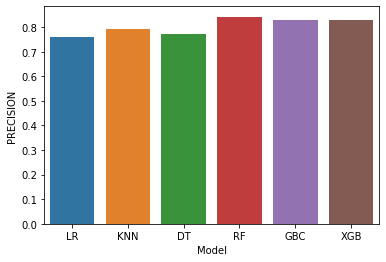

In [71]:
sns.barplot(performance_summary['Model'],performance_summary['PRECISION'])

# Saving the best model, XGBoost

In [72]:
X_train = sc.fit_transform(X_train)
model_xgb.fit(X_res,y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [73]:
import joblib

In [74]:
joblib.dump(model_xgb, 'churn_predict_model')

['churn_predict_model']

In [75]:
model = joblib.load('churn_predict_model')

In [76]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [101]:
df.shape

(10000, 12)

In [89]:
X_test[13]

array([ 0.37954015,  0.29746336, -0.67996993, -0.12488295,  2.72334959,
       -1.29483228, -0.77511556, -0.64011773, -0.57182592,  2.16780684,
        1.19707923])

In [88]:
from joblib import dump, load
import numpy as np
model = load('churn_predict_model')
features = np.array([[-0.69164998,  0.99599336, -1.0493445 ,  0.92356799, -0.73567983,
        0.77230079,  1.29013021, -0.1566831 , -0.57182592, -0.46129571,
        1.19707923]])
model.predict(features)

array([0])

In [90]:
from joblib import dump, load
import numpy as np
model = load('churn_predict_model')
features = np.array([[0.37954015,  0.29746336, -0.67996993, -0.12488295,  2.72334959,
       -1.29483228, -0.77511556, -0.64011773, -0.57182592,  2.16780684,
        1.19707923]])
model.predict(features)

array([1])